In [1]:
figure_and_data_name = "fig_00_google_trends"

# Import modules and make plots nice

In [2]:
%matplotlib inline
from pytrends.request import TrendReq
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sns.set_context("talk")
sns.set_style("darkgrid")
plt.rcParams["figure.figsize"] = [8, 5]

# Functions for time mean and normalization

In [4]:
def get_annual_mean_trend(kw_list, **kwargs):
    trend = TrendReq()
    trend.build_payload(kw_list, timeframe="all")
    trend = trend.interest_over_time()
    trend = trend.resample("1a").mean()
    return trend

In [5]:
def normalize_time_series(time_series):
    time_series /= time_series.max()
    return(time_series)

# Get Google Trend data

In [6]:
open_science_trend = get_annual_mean_trend(["open science"])
open_access_trend = get_annual_mean_trend(["open access"])

# combine two keywords
rep_trend = get_annual_mean_trend(["reproducibility crisis",
                                   "replicability crisis", 
                                   "replication crisis"]
                                 ).sum(axis=1).rename("rep... crisis")

# Combine and save data

In [7]:
combined = pd.concat(
    map(normalize_time_series, [open_science_trend,
                                open_access_trend,
                                rep_trend]),
    axis=1)
combined.to_csv("../data/{}.csv".format(figure_and_data_name))

# Plot and save

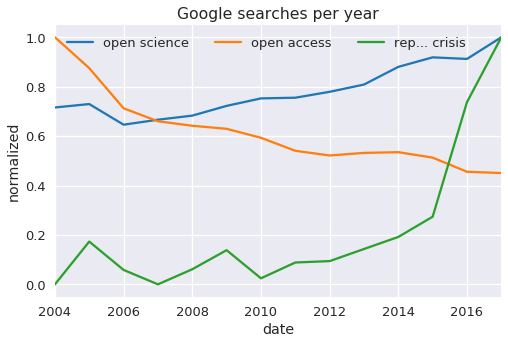

In [8]:
ax = combined.plot()
ax.set_ylabel("normalized")
ax.set_title("Google searches per year")
ax.legend(loc=0, ncol=3)

plt.savefig("../images/{}.svg".format(figure_and_data_name))